In [4]:
# Import required packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Section 6 : Regression by Grid Search

Consider the function , $$f(\textbf{x},\Theta) = \theta_1 x_1^2 + \theta_2 x_2$$
to be fitted to the "dataset3.npz". Assume that an initial solution to this function is already obtained by Gradient descent, it is found to $\Theta_0 = (1, 4)^T$. Perform grid search in a suitable neighbourhood of this point and precisely estimate $\Theta$.

In [70]:
def computeCost(x1, x2, y, theta1, theta2):
    return np.mean(np.square(y - (np.square(x1) * theta1 + x2*theta2)))

In [71]:
x1 = np.load('.\dataset4.npz')['x1']
x2 = np.load('.\dataset4.npz')['x2']
y = np.load('.\dataset4.npz')['y']

X = np.c_[x1, x2]

theta1_initial = 1
theta2_initial = 4

# Construct a uniform grid
theta1_values = np.linspace(theta1_initial - 2, theta1_initial + 2, 1000)
theta2_values = np.linspace(theta2_initial - 2, theta2_initial + 2, 1000)
min_cost = np.inf
theta1, theta2 = 0, 0

# Perform search
for i in theta1_values:
    for j in theta2_values:
        current_cost = computeCost(x1, x2, y, i, j)
        if current_cost < min_cost:
            min_cost = current_cost
            theta1 = i
            theta2 = j
            
print("Value of theta for minimum cost: theta1 = {}, theta2 = {}".format(theta1, theta2))
print("Theta = ")
print(np.array([theta1, theta2]).reshape((2, 1)))

Value of theta for minimum cost: theta1 = 1.5705705705705704, theta2 = 3.781781781781782
Theta = 
[[1.57057057]
 [3.78178178]]


In [73]:
print("Minimum cost value = ", min_cost)

Minimum cost value =  2.5934240481385262e-05


# Section 7 : Linear Regression with Sklearn

Four Main Assumptions:
1. Linear relationship between features and target,
2. Homoscedasticity: The variance of residual is the same for any value of X,
3. Independence: Observations are independent of each other,
3. No multi-collinearity among features i.e features are indepent

**General Note : Attributes and parameters should be chosen according to the question asked** 

In [86]:
# For performing regression operations
from sklearn.linear_model import LinearRegression # Fitting the linear regression
from sklearn.preprocessing import PolynomialFeatures # To convert the features into polynomial features
from sklearn.metrics import mean_squared_error # This is our cost function a.k.a loss function

### 7.1. Importing Dataset and Visualisation

1) Import the data X and y from the **"dataset2.npz"** 

2) Print the the top 10 rows of X and y. and Scattter plot of X and y

In [30]:
# Import data
X = np.load("dataset2.npz")['x']
y = np.load("dataset2.npz")['y']

minX = min(X)
maxX = max(X)
# Print top 10 rows
df = pd.DataFrame(data=np.c_[X, y], columns=["X", "y"])
df.head(10)

,X,y
0,10.0,137.301045
1,-4.0,30.271964
2,4.0,41.390876
3,8.0,100.522686
4,-8.0,73.172712
5,6.0,70.655139
6,0.0,12.588404
7,-6.0,40.188202
8,-2.0,7.038657
9,2.0,31.625718


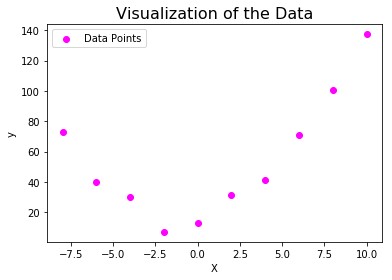

In [31]:
# Scatter plot of the Data
plt.scatter(X, y, color = 'magenta', label="Data Points")
plt.title("Visualization of the Data", size=16)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Fit a polynomial model (for the suggested degree) to the data. Comment on the fit (as a function of the model) in terms of the mean square error.

(Hint: Use in-built libraries from Scikit-learn for the exercise.)

### 7.2. Degree 1 (Linear)

3) Using linear regression, find a relation between $Y$ and $X$. Plot the regression function(vs $X$) and report the mean square error.

Mean Squared Error = 977.1734445909718

Relationship between y and X: y = 4.0106249536927425X + 50.46491531627612


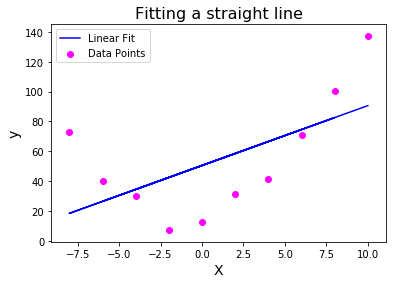

In [47]:
model1 = LinearRegression()
X = X.reshape(-1, 1)
model1.fit(X, y)

y_pred = model1.predict(X)

print("Mean Squared Error =", mean_squared_error(y, y_pred))
print()
print("Relationship between y and X: y = {}X + {}".format(model1.coef_[0], model1.intercept_))

# Visulaize
plt.plot(X, y_pred, color = 'blue', label="Linear Fit")
plt.scatter(X, y, color = 'magenta', label="Data Points")
plt.title("Fitting a straight line", size=16)
plt.xlabel("X", size=14)
plt.ylabel("y", size=14)
plt.legend()
plt.show()

The linear regression model has high bias and underfits the data. The linear fit is a very poor fit for the given data.

### 7.3. Degree 2 (Quadratic)

3) Using polynomial regression of degree 2, Find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

Mean Squared Error for degree = 2 is: 24.84633172780818


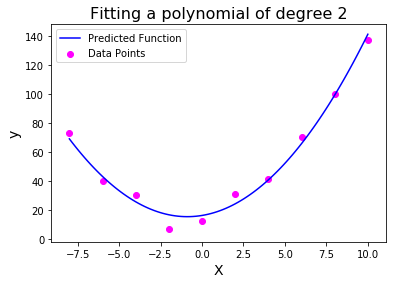

In [46]:
poly = PolynomialFeatures(2)
X = X.reshape(-1, 1)
X_transformed = poly.fit_transform(X)

model2 = LinearRegression()
model2.fit(X_transformed, y)
y_pred = model2.predict(X_transformed)

print("Mean Squared Error for degree = 2 is:", mean_squared_error(y, y_pred))

# Visualize
x_values = np.linspace(minX, maxX, 100)
x_values_transformed = poly.fit_transform(x_values.reshape(-1, 1))
y_values = model2.predict(x_values_transformed)
plt.plot(x_values, y_values, color = 'blue', label="Predicted Function")
plt.scatter(X, y, color = 'magenta', label="Data Points")
plt.title("Fitting a polynomial of degree 2", size=16)
plt.xlabel("X", size=14)
plt.ylabel("y", size=14)
plt.legend()
plt.show()

### 7.4. Degree 3 (Cubic)

4) Using polynomial regression of degree 3, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error

Mean Squared Error for degree = 3 is: 16.26492228044507


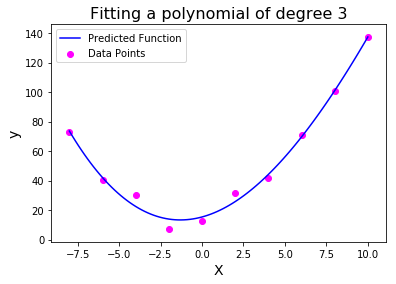

In [48]:
poly = PolynomialFeatures(3)
X = X.reshape(-1, 1)
X_transformed = poly.fit_transform(X)

model3 = LinearRegression()
model3.fit(X_transformed, y)
y_pred = model3.predict(X_transformed)

print("Mean Squared Error for degree = 3 is:", mean_squared_error(y, y_pred))

# Visualize
x_values = np.linspace(minX, maxX, 100)
x_values_transformed = poly.fit_transform(x_values.reshape(-1, 1))
y_values = model3.predict(x_values_transformed)
plt.plot(x_values, y_values, color = 'blue', label="Predicted Function")
plt.scatter(X, y, color = 'magenta', label="Data Points")
plt.title("Fitting a polynomial of degree 3", size=16)
plt.xlabel("X", size=14)
plt.ylabel("y", size=14)
plt.legend()
plt.show()

### 7.5. Degree 9

5) Using polynomial regression of degree 9, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

Mean Squared Error for degree = 3 is: 7.586223321917308e-13


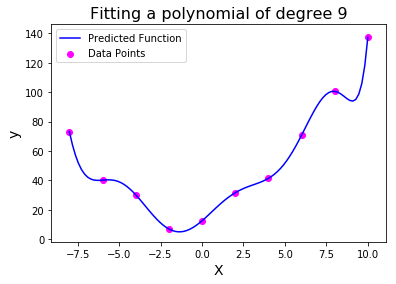

In [51]:
poly = PolynomialFeatures(9)
X = X.reshape(-1, 1)
X_transformed = poly.fit_transform(X)

model9 = LinearRegression()
model9.fit(X_transformed, y)
y_pred = model9.predict(X_transformed)

print("Mean Squared Error for degree = 3 is:", mean_squared_error(y, y_pred))

# Visualize
x_values = np.linspace(minX, maxX, 100)
x_values_transformed = poly.fit_transform(x_values.reshape(-1, 1))
y_values = model9.predict(x_values_transformed)
plt.plot(x_values, y_values, color = 'blue', label="Predicted Function")
plt.scatter(X, y, color = 'magenta', label="Data Points")
plt.title("Fitting a polynomial of degree 9", size=16)
plt.xlabel("X", size=14)
plt.ylabel("y", size=14)
plt.legend()
plt.show()

### 7.6. Training Error

6) Plot the mean square error versus the degree of the polynomial fit (for degree = 0,1, ..., 9). Comment on the best model for the data based on MSE of training error

**Note** : Degree 0 means just the intercept

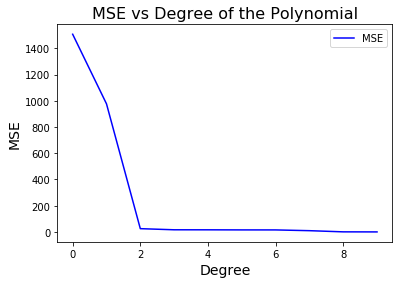

,Degree,Mean Squared Error
0,0.0,1.507982e+03
1,1.0,9.771734e+02
2,2.0,2.484633e+01
3,3.0,1.626492e+01
4,4.0,1.603136e+01
5,5.0,1.535621e+01
6,6.0,1.522223e+01
7,7.0,9.477956e+00
8,8.0,4.898616e-01
9,9.0,7.586223e-13


In [55]:
degrees = list(range(0, 10))
mean_sq_errors = []
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X = X.reshape(-1, 1)
    X_transformed = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_transformed, y)
    y_pred = model.predict(X_transformed)
    
    mean_sq_errors.append(mean_squared_error(y, y_pred))
    
plt.plot(degrees, mean_sq_errors, color="blue", label="MSE")
plt.title("MSE vs Degree of the Polynomial", size=16)
plt.xlabel("Degree", size=14)
plt.ylabel("MSE", size=14)
plt.legend()
plt.show()

df_error = pd.DataFrame(data = np.c_[degrees, mean_sq_errors], columns=["Degree", "Mean Squared Error"])
df_error.head(10)

Based on the mean squared error on training set error, the best model fits a polynomial of degree 9. It achieves minimum mean squared error.

### 7.7. Test error

Load **'dataset2_test.npz'**. The data points in the file are from the same distribution as the ones in 'dataset2.npz'.

7) Plot the mean square error by predicting outputs on the test dataset using the trained models of degrees 0,1,...9 obtained with the training data set **dataset2.npz**. Now, comment on the best model for data based on MSE on both training and test datasets.

(Hint: Plot Training error and Testing error in the same plot.) Use Matplotlib for plotting

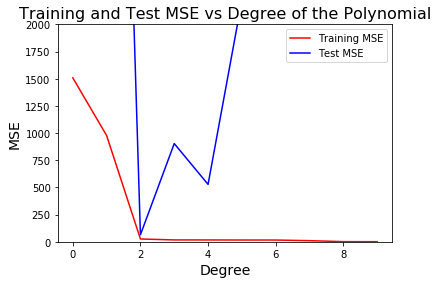

In [65]:
# Import data
X_test = np.load("dataset2_test.npz")['x']
y_test = np.load("dataset2_test.npz")['y']

# Convert 1D to 2D
X = X.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

degrees = list(range(0, 10))
training_errors = []
test_errors = []
for degree in degrees:
    poly = PolynomialFeatures(degree)

    X_transformed = poly.fit_transform(X)
    X_test_transformed = poly.fit_transform(X_test)

    model = LinearRegression()
    
    # Training
    model.fit(X_transformed, y)
    y_pred = model.predict(X_transformed)
    training_errors.append(mean_squared_error(y, y_pred))
    
    # Test
    y_pred_test = model.predict(X_test_transformed)
    test_errors.append(mean_squared_error(y_test, y_pred_test))
    
plt.plot(degrees, training_errors, color="red", label="Training MSE")
plt.plot(degrees, test_errors, color="blue", label="Test MSE")
plt.title("Training and Test MSE vs Degree of the Polynomial", size=16)
plt.xlabel("Degree", size=14)
plt.ylabel("MSE", size=14)
plt.ylim([-1, 2000])
plt.legend()
plt.show()

Based on the Mean Squared Error on the test data, the best model fits a polynomial of degree 2.

### 7.8. Best Degree of polynomial

8)Hint : Based on Test error.

In [103]:
print("Best degree of polynomial = {}".format(np.argmin(test_errors)))

Best degree of polynomial = 2


# Section 8 : Multiple Linear Regression on Boston Housing Price Data
Import data from **"dataset3.csv"**. This is one among the sklearn standard datasets which can be used to develop a model for house price prediction "load_boston". Description of the features can be found in the sklearn documentation if you want to explore.

## 8.1. Describe the data
Hint :  Categorical features = ['RAD', 'CHAS', 'ZN'], Non-categorical features = Except categorical all the other features
1. Find Mean, Median for Non-categorical features and Price, Mode only for Categorical feaures
2. Find Quantiles at 25th, 50th, 75th for Non-categorical features and Price
3. Find Maximum and Minimum, Range of the data (max -min) for Non-categorical features and Price
4. Find Distributions (Histogram) for Non-categorical features and Price (Using Seaborn is suggested)

**Note** - Dont use pandas.describe here. You may use inbuilt functions from numpy package. You can store the above descriptive statistics in a dataframe and print that dataframe.

In [74]:
df = pd.read_csv("dataset3.csv")
column_names = list(df.columns)
categorical_features = ['RAD', 'CHAS', 'ZN']
non_categorical_features = [col for col in column_names if col not in categorical_features]

#### Mode for Categorical Features

In [75]:
# Mode for categorical variables
from statistics import mode
mode_list = []
for col in categorical_features:
    mode_list.append(mode(df[col]))
    
df_mode = pd.DataFrame(mode_list, columns=["Mode"], index=categorical_features)
df_mode

,Mode
RAD,24.0
CHAS,0.0
ZN,0.0


#### Non-categorical Features and Price

In [76]:
# Non-categorical features and Price
measures_list = []
col_names = ["Mean", "Median", "Maximum", "Minimum", "Range", "25% quantile", "50% quantile", "75% quantile"]

for col in non_categorical_features:
    temp = []
    temp.append(np.mean(df[col]))
    temp.append(np.median(df[col]))
    temp.append(np.max(df[col]))
    temp.append(np.min(df[col]))
    temp.append(np.max(df[col]) - np.min(df[col]))
    temp.append(df[col].quantile(0.25))
    temp.append(df[col].quantile(0.5))
    temp.append(df[col].quantile(0.75))
    measures_list.append(temp)
    
df_measures = pd.DataFrame(measures_list, columns=col_names, index=non_categorical_features)
df_measures

,Mean,Median,Maximum,Minimum,Range,25% quantile,50% quantile,75% quantile
CRIM,3.613524,0.25651,88.9762,0.00632,88.96988,0.082045,0.25651,3.677083
INDUS,11.136779,9.69000,27.7400,0.46000,27.28000,5.190000,9.69000,18.100000
NOX,0.554695,0.53800,0.8710,0.38500,0.48600,0.449000,0.53800,0.624000
RM,6.284634,6.20850,8.7800,3.56100,5.21900,5.885500,6.20850,6.623500
AGE,68.574901,77.50000,100.0000,2.90000,97.10000,45.025000,77.50000,94.075000
DIS,3.795043,3.20745,12.1265,1.12960,10.99690,2.100175,3.20745,5.188425
TAX,408.237154,330.00000,711.0000,187.00000,524.00000,279.000000,330.00000,666.000000
PTRATIO,18.455534,19.05000,22.0000,12.60000,9.40000,17.400000,19.05000,20.200000
B,356.674032,391.44000,396.9000,0.32000,396.58000,375.377500,391.44000,396.225000
LSTAT,12.653063,11.36000,37.9700,1.73000,36.24000,6.950000,11.36000,16.955000


#### Distributions for Non-Categorical Features

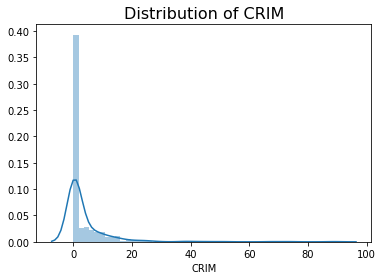

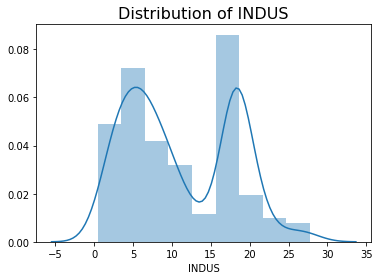

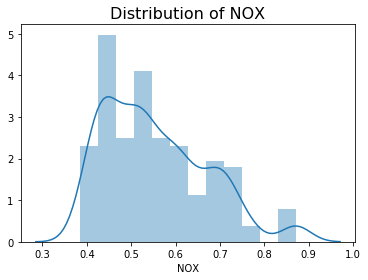

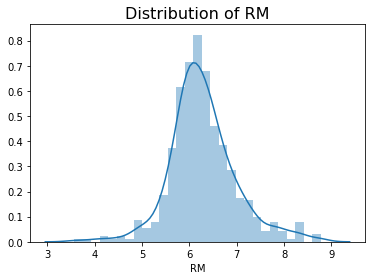

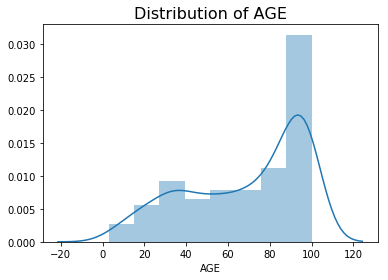

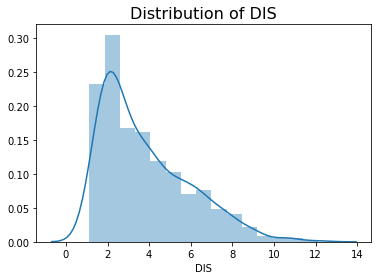

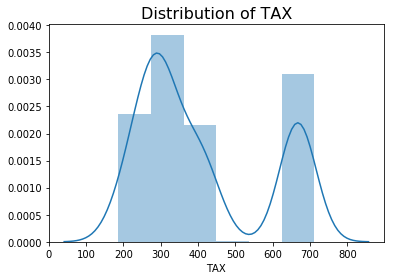

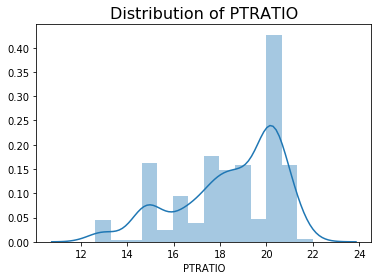

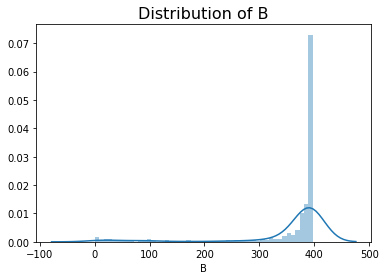

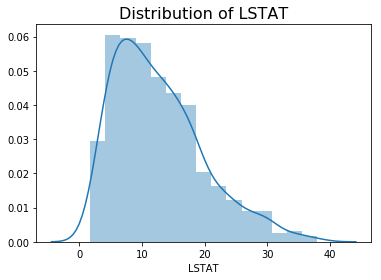

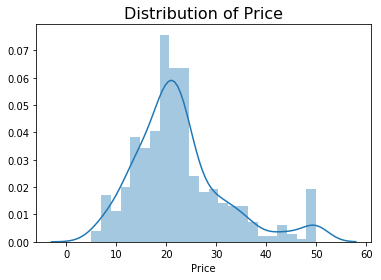

In [77]:
for col in non_categorical_features:
    plt.title("Distribution of {}".format(col), size=16)
    sns.distplot(df[col])
    plt.show()

## 8.2. Correlation Heatmap for all the features and target
**Hint** : Use Seaborn library to plot, note keep annotate = True

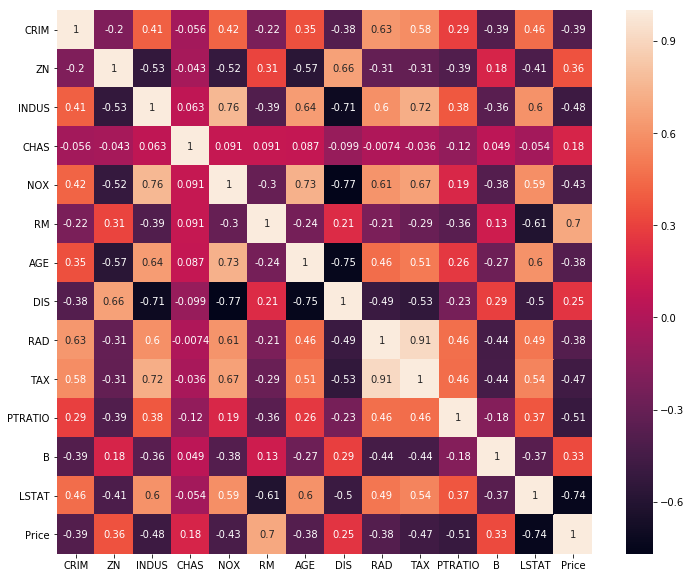

In [78]:
corr = df.corr()
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

## 8.3. Highly Correlated features
Find and print the highly correlated features with respect to "Price".

Highly correlated features have a correlation coefficient that lies in [-1, -0.5] or [0.5, 1]

In [79]:
df.corr()['Price']['CRIM']
corr = df.corr()

highly_corr = []
for col in column_names:
    if col!='Price' and abs(corr['Price'][col]) >= 0.5:
        highly_corr.append((col, corr['Price'][col]))
        
print("Features highly correlated with Price")
print(*highly_corr, sep="\n")

Features highly correlated with Price
('RM', 0.6953599470715394)
('PTRATIO', -0.507786685537561)
('LSTAT', -0.7376627261740143)


In [80]:
corr_values = []
for col in column_names:
    if col!='Price':
        corr_values.append((col, corr['Price'][col]))
sorted(corr_values, key=lambda x: abs(x[1]), reverse=True)

[('LSTAT', -0.7376627261740143),
 ('RM', 0.6953599470715394),
 ('PTRATIO', -0.507786685537561),
 ('INDUS', -0.483725160028373),
 ('TAX', -0.46853593356776646),
 ('NOX', -0.4273207723732816),
 ('CRIM', -0.3883046085868114),
 ('RAD', -0.3816262306397776),
 ('AGE', -0.3769545650045959),
 ('ZN', 0.3604453424505447),
 ('B', 0.33346081965706653),
 ('DIS', 0.24992873408590394),
 ('CHAS', 0.1752601771902975)]

In the above cell I have printed the features in the decreasing order of correlation

## 8.4. Split the Dataset
**Hint** : Use sklearn train_test_split to split the data into train and test data, keep random state = 2020 and test_size = 0.33

In [81]:
for col in non_categorical_features:
    if col != 'Price':
        col_mean = df[col].mean()
        col_std = df[col].std()
        df[col] = df.apply(lambda x: (x[col] - col_mean)/col_std, axis = 1)

In [82]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.419367,18.0,-1.286636,0.0,-0.144075,0.413263,-0.119895,0.140075,1.0,-0.665949,-1.457558,0.440616,-1.074499,24.0
1,-0.416927,0.0,-0.592794,0.0,-0.739530,0.194082,0.366803,0.556609,2.0,-0.986353,-0.302794,0.440616,-0.491953,21.6
2,-0.416929,0.0,-0.592794,0.0,-0.739530,1.281446,-0.265549,0.556609,2.0,-0.986353,-0.302794,0.396035,-1.207532,34.7
3,-0.416338,0.0,-1.305586,0.0,-0.834458,1.015298,-0.809088,1.076671,3.0,-1.105022,0.112920,0.415751,-1.360171,33.4
4,-0.412074,0.0,-1.305586,0.0,-0.834458,1.227362,-0.510674,1.076671,3.0,-1.105022,0.112920,0.440616,-1.025487,36.2


In [83]:
X = np.array(df[[col for col in column_names if col != 'Price']])
y = np.array(df['Price'])

In [87]:
# For performing regression operations
from sklearn.linear_model import LinearRegression # Fitting the linear regression
from sklearn.preprocessing import PolynomialFeatures # To convert the features into polynomial features
from sklearn.metrics import mean_squared_error # This is our cost function a.k.a loss function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2020)

## 8.5. Train the model on only train data using linear_regression
Report Train MSE

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
# train_mse = mean_squared_error((y_train * y_std + y_mean), (y_pred_train * y_std + y_mean))
train_mse = mean_squared_error(y_train, y_pred_train)
print("Train MSE =", train_mse)

Train MSE = 22.166423224150186


## 8.6. Predict Outputs for Test Data
Report test MSE

In [89]:
y_pred_test = model.predict(X_test)
# test_mse = mean_squared_error((y_test * y_std + y_mean), (y_pred_test * y_std + y_mean))
test_mse = mean_squared_error(y_test, y_pred_test)
print("Test MSE =", test_mse)

Test MSE = 22.004861555354854


## 8.7. Important Features
Find and print the featuers in order of their importance based on trained regression model.

I am assuming that the absolute value of the coefficient in the learned function determines how important a feature is.

In [90]:
feature_importance = []
feature_columns = [col for col in column_names if col!='Price']
for i, col in enumerate(feature_columns):
    feature_importance.append((col, abs(model.coef_[i])))
    
feature_importance.sort(key=lambda x: x[1], reverse=True)

pd.DataFrame(feature_importance, columns=["Feature", "Importance (coefficient)"])

,Feature,Importance (coefficient)
0,LSTAT,3.594757
1,CHAS,3.472599
2,DIS,3.068539
3,RM,3.039611
4,PTRATIO,1.942691
5,TAX,1.848386
6,NOX,1.778746
7,CRIM,1.016368
8,B,0.823114
9,RAD,0.297183


### Homoscedasticity

In [111]:
all_labels = np.array(list(y_train) + list(y_test))
all_predictions  = np.array(list(y_pred_train) + list(y_pred_test))
residuals = all_labels - all_predictions

[21.824315695186883, 21.815757132010518, 40.520035727613475, 19.82433866783193, 21.684099937389618, 12.80764983485797, 16.839790272330625, 12.096716633080291, 28.11517800993332, 24.599926339481925, 4.776210237200636]


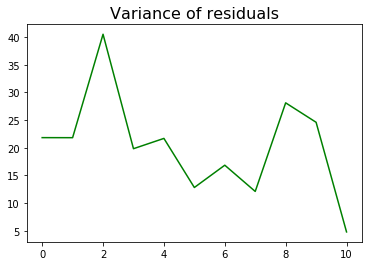

In [116]:
group_size = 50
variances = []
for i in range(0, residuals.shape[0], group_size):
    variances.append(np.std(residuals[i:i+group_size])**2)
    
print(variances)
plt.plot(variances, color='green')
plt.title("Variance of residuals", size=16)
plt.show()

The variance of residuals changes, this shows that the assumption of homoscedasticity is not valid

# Q&A Section :
1. Comment on assumptions validity discussed in Section 7 with this dataset? Whether we satisfied assumptions or not.
2. Is there any relation between highly important features(from Section 8.7) and highly correlated features with price?Only give descriptive observation.
3. Why usually test error is higher than training error?
4. Will Analytical solution discussed in the Notebook 1 Section 2 be valid on this dataset? Why or Why not?

1. Validity of Assumptions:
    * Linear relationship between features and target: This is a valid assumption, as we get a low value of both training and test error on fitting a linear regression model to the data. If this assumption was invalid, we would have had underfitting where both training and test errors are large. However we have comparable values for both (and they are low) which implies that the assumption is valid.
    * Homoscedasticity: The variance of residuals changes, this shows that the assumption of homoscedasticity is not valid. The values can be found in the above graph.
    * Independence: The observations are not independent of each other, as the training matrix has a shape 506 x 13, so the maximum possible rank of the matrix is 13, and we can have only 13 independent observations.
    * Independent Features: The pairwise correlation coefficient is not zero for any pair of features, showing that the features are not independent. If the features were independent, then the pairwise correlation coefficient must have been 0.
    
 
2. Yes from the values of correlation between the "Price" and each column, and also comparing the final coefficients learned by the linear regression model, we can see that highly important features (measured by absolute value of coefficients) and highly correlated features are the same. This is because features that are highly correlated with the output variable will influence its value more, so they get high coefficients.


3. Test error is usually higher than the training error because the model is trained only on the training data and it tries to fit a function to the training data. The test data consists of points that the model has never seen before, resulting in higher value for the test error as compared to the training error.


4. Yes, the analytical solution is valid, as $X^TX$ is invertible in this case and the number of features is only 13, which is low enough for the $O(N^3)$ algorithm to not become too computationally expensive.

In [230]:
t = np.dot(np.linalg.inv(np.dot(X_normalized.T, X_normalized)), np.dot(X_normalized.T, y_normalized))